### Numpy basics

In [23]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [ ]:
m = np.arange(12).reshape((3,4))

In [ ]:
print(m) #the initial matix
print("Row: {}".format(m.mean(axis=1))) #mean by the row
print("Column: {}".format(m.mean(axis=0))) #mean my the column
print("Matrix: {}".format(m.mean())) #mean of the overall matrix


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

In [ ]:
print("Outer \n {}".format(np.outer(u,v)))
print("List comprehension \n {}".format(np.array([i*j for i in u for j in v]).reshape(4,4))) #reshape from list to matix
print("Numpy \n {}".format(u[:,None]*v))


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
matrix = np.random.uniform(size=(10,6))

print("Initial \n {} \n".format(matrix))

print("Final with only elms setted to zero \n {} \n".format(np.where(matrix<0.1,0,matrix)))

matrix[np.any(matrix<0.1,axis=1)]=0
print("Final \n {}".format(matrix))

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [24]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
linspace = np.linspace(0, 2*math.pi, num=100, endpoint=True)
print("initial linspaece \n {} \n".format(linspace))
extracted = linspace[::10]

print("Extacted elements: \n {} \n".format(extracted))

revers = linspace[::-1]
print("Reversed the inital linspace: \n {}\n".format(revers))

extracted = linspace[np.where(abs(np.sin(linspace)-np.cos(linspace))<0.1)]
print("Searched elements: \n {} \n".format(extracted))


x = np.sin(linspace) #numpy sin
y = np.cos(linspace) #numpy cos
plt.plot(linspace, x,'r-') 
plt.plot(linspace, y,'b-')

idx = np.argwhere(abs(x-y)<0.1).flatten()  #find where abs(x-y)<0.1 and flatten the results to have (n,) as shape
plt.plot(linspace[idx], x[idx], 'ro')
plt.plot(linspace[idx], y[idx], 'ro')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
#10x10 starting from 1
matrix = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)

print("Trace: \n {} \n".format(matrix.trace()))

print("Anti diagonal method 1: \n {} \n".format(np.diag(matrix[:,::-1]))) #all reversing the column of the matrix -> diag
r = [i for i in range(9,-1,-1)]
c = [9-i for i in range(9,-1,-1)]
print("Anti diagonal method 2: \n {} \n".format(matrix[r,c]))
print("Diag with offset: \n {} \n".format(np.diag(np.roll(matrix, -1, axis=0))))


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
route66 = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
d2grid = route66[None,:]-route66[:,None]
print("Initial grid: \n {} \n".format(d2grid))
print("Converted: \n {} \n".format(d2grid*1.609344))

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

On my laptop:

- N = 100
 - 319 µs ± 224 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 31.1 µs ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

- N = 1000
 - 4.8 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 227 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

- N = 10000
 - 288 ms ± 7.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 - 2.43 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

As we an see the fasted is as expected the second implementation with the optimization suggested.
The performance is not linear for the first implementation 10 times the size does not imply 10 times more computational time(easily seen between the second and the first run).
For the optimized one more or less it can be seen in that way.

In [ ]:
N = 100
def impl(N):
    mat = np.ones((N-1,), dtype=bool)
    numb = np.array([x for x in range(1,N)])
    for i in range(2,math.ceil(N/2)):
        mat[(numb%i==0) & (numb > i)] = False

def impl2(N):
    mat = np.ones((N-1,), dtype=bool)
    numb = np.array([x for x in range(1,N)])
    
    for i in range(2,math.ceil(N**0.5)-1):
        if(mat[i]):
            for j in range(i**2,N-1):
                mat[j] = False
    
%timeit -n 10 impl(N)
%timeit -n 10 impl2(N)
%timeit -n 10 impl(N*10)
%timeit -n 10 impl2(N*10)
%timeit -n 10 impl(N*100)
%timeit -n 10 impl2(N*100)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

The result is correct since it respect the proportionality between  $\sqrt{\sigma_{X}^2}$ and the time.

In [ ]:
np.random.seed(10)
walkers_x = np.zeros((1000,200))
for i in range(walkers_x.shape[0]):
    mat = np.random.randint(-1,1,size=walkers_x.shape[1]) #produce -1,0
    mat[mat==0]=1 #set the 0 to 1
    walkers_x[i] = mat

walkers_y = np.zeros((1000,200))
for i in range(walkers_y.shape[0]):
    mat = np.random.randint(-1,1,size=walkers_y.shape[1]) #produce -1,0
    mat[mat==0]=1 #set the 0 to 1
    walkers_y[i] = mat
    
sums_x = np.cumsum(walkers_x, axis=1)
sq_sums_x = sums_x**2
means_x = np.mean(sq_sums_x, axis=0)
plt_x = plt
plt_x.plot(means_x**0.5)
plt_x.show()

sums_y = np.cumsum(walkers_y, axis=1)
sq_sums_y = sums_y**2
means_y = np.mean(sq_sums_y, axis=0)
plt_y = plt
plt_y.plot(means_y**0.5)
plt_y.show()

plt.plot(sums_x[0,:],sums_y[0,:])

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

- Seems so since the populations grows and decrese one after the other. The circle of life. When the relative "predator" disappear one of the species grows, providing to the predator food and so letting its population growing again. After a while the predator overcome the prey and the circle restarts.

In [ ]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

# year	hare	lynx	carrot

1900	30e3	4e3	48300
max population: carrot 

1901	47.2e3	6.1e3	48200
max population: carrot 

1902	70.2e3	9.8e3	41500
max population: hare 

1903	77.4e3	35.2e3	38200
max population: hare 

1904	36.3e3	59.4e3	40600
max population: lynx 

1905	20.6e3	41.7e3	39800
max population: lynx 

1906	18.1e3	19e3	38600
max population: carrot 

1907	21.4e3	13e3	42300
max population: carrot 

1908	22e3	8.3e3	44500
max population: carrot 

1909	25.4e3	9.1e3	42100
max population: carrot 

1910	27.1e3	7.4e3	46000
max population: carrot 

1911	40.3e3	8e3	46800
max population: carrot 

1912	57e3	12.3e3	43800
max population: hare 

1913	76.6e3	19.5e3	40900
max population: hare 

1914	52.3e3	45.7e3	39400
max population: hare 

1915	19.5e3	51.1e3	39000
max population: lynx 

1916	11.2e3	29.7e3	36700
max population: carrot 

1917	7.6e3	15.8e3	41800
max population: carrot 

1918	14.6e3	9.7e3	43300
max population: carrot 

1919	16.2e3	10.1e3	41300
max population: carrot 

1920	24.7e3	8.

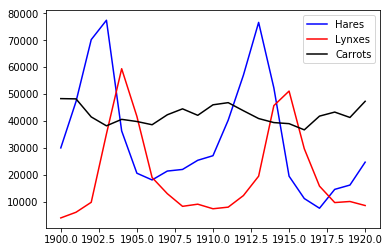

In [26]:
with open('populations.txt') as f:
    #file = np.loadtxt('populations.txt',dtype='int64') works with 1.15.* numpy
    file = np.loadtxt('populations.txt')
    maxpop = file[:,1:].argmax(axis=1)

    c = -1
    pop = ''
    for line in f:
        if c >= 0:
            if maxpop[c] == 0:
                pop = "max population: hare \n"
            elif maxpop[c] == 1:
                pop = "max population: lynx \n"
            else:
                pop = "max population: carrot \n"
        print(line + pop)
        c += 1

    years = file[:,0]
    hares = file[:,1]
    lynxes = file[:,2]
    carrots = file[:,3]
    plt.plot(years, hares, 'b-',label='Hares')
    plt.plot(years, lynxes, 'r-',label='Lynxes')    
    plt.plot(years, carrots, 'k-',label='Carrots')
    plt.legend()

    print("Hares mean: {}, std: {}".format(hares.mean(),hares.std()))
    print("Lynxes mean: {}, std: {}".format(lynxes.mean(),lynxes.std()))    
    print("Carrots mean: {}, std: {}".format(carrots.mean(),carrots.std()))
    print("\n")
    print("Carrots vs Hares correlation: \n {}".format(np.corrcoef(carrots,hares)))
    print("Lynxes vs Hares correlation: \n {}".format(np.corrcoef(hares,lynxes)))    
    print("Lynxes vs Carrots correlation: \n {}".format(np.corrcoef(lynxes,carrots)))    
    print("Whole data against each other corr: \n {}".format(np.corrcoef(file, rowvar=False)))
    print("\n")

*Exercise*: write an algorithm that determins and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

In [44]:
maxcorr = 0
for i in range(len(lynxes)):
    corr = np.corrcoef(hares,np.roll(lynxes,-i))
    if maxcorr < corr[0,1]:
        maxcorr = corr[0,1]
        shift = i
        
print("Lynxes and Hares have max correlation of: {} shifting {} years.".format(maxcorr,shift))

maxcorr = 0
for i in range(len(lynxes)):
    corr = np.corrcoef(carrots,np.roll(lynxes,-i))
    if maxcorr < corr[0,1]:
        maxcorr = corr[0,1]
        shift = i
        
print("Lynxes and Carrots have max correlation of: {} shifting {} years.".format(maxcorr,shift))

maxcorr = 0
for i in range(len(carrots)):
    corr = np.corrcoef(carrots,np.roll(hares,-i))
    if maxcorr < corr[0,1]:
        maxcorr = corr[0,1]
        shift = i
        
print("Hares and Carrots have max correlation of: {} shifting {} years".format(maxcorr,shift))

Lynxes and Hares have max correlation of: 0.9272216513116692 shifting 2 years.
Lynxes and Carrots have max correlation of: 0.8223515889558041 shifting 4 years.
Hares and Carrots have max correlation of: 0.8701106492482901 shifting 2 years
